In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("albums_all.csv")

### Attributes
* ID: A unique identifier for every row
* Name: Name of the album
* Release Date: Release date of the album
* Artists: All the artists of the album
* Total_tracks: Number of total tracks of the album
* T_name: Name of the track
* Duration: Duration of the track (in ms)
* Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements.  A value of 0.0 is least danceable and 1.0 is the most danceable.
* Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* Key: The key the track is in. Integers map to pitches using standard Pitch
* Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.-
* Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording, the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* Instrumentalness: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
* Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.
* Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative (e.g. sad, depressed, angry).
* Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* Time Signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).


### Notes

* dataset is highly skewed, if we use the release_date of the albums as a feature.

In [10]:
df.head()

,name,id,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,"""Fragtime"" Theme Song ""Fragile""",22352,2000,"Moritani Misuzu (CV:Miku Ito), Murakami Haruka...",4,Fragile,11:00a.m.,Fragile - Instrumental,292720,293760.0,...,0.330,0.5390,0.1920,84.008,187.910,84.002,4.0,3.0,4.0,21
1,"""Green n' gold Hits""",106534,2011-09-16,"C.W.A. Cheeseheads With Attitude,",12,"""Packer Face"" (Everybody Vince Lombardi)","""I Love Green Bay"" (Player Mix)","""Beer Wit Da Bret""",213760,181000.0,...,0.965,0.7830,0.3770,119.032,128.002,181.241,4.0,4.0,4.0,14
2,"""Zuhause Live: Das Laune der Natour-Finale"" pl...",23608,2019-03-29,"Die Toten Hosen,",59,Laune der Natur - das Intro - Live in Düsseldo...,Opel-Gang - Live in Düsseldorf 2018,Auswärtsspiel - Live in Düsseldorf 2018,157124,130446.0,...,0.579,0.0475,0.0945,84.010,127.755,99.284,4.0,4.0,4.0,41
3,#Gsnls,8655,2020-08-02,"Surf'n,",8,Lock'n Legs,Capt'n Saven Em,Bloods & Crips,127896,176351.0,...,0.624,0.3840,0.6510,100.053,99.999,95.017,4.0,4.0,4.0,1
4,#Hektarparty,49670,2018-09-21,"Die Draufgänger,",17,Die Hektar hat 2.0,Johnny Deere,Gina Lisa (Spiel mit deinen Glocken),210320,226253.0,...,0.840,0.6650,0.5200,128.041,132.013,135.969,4.0,4.0,4.0,47


In [8]:
df.shape

(2833, 45)

In [5]:
##df.corr()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2833 non-null   object 
 1   id            2833 non-null   int64  
 2   release_date  2833 non-null   object 
 3   artists       2833 non-null   object 
 4   total_tracks  2833 non-null   int64  
 5   t_name0       2833 non-null   object 
 6   t_name1       2833 non-null   object 
 7   t_name2       2833 non-null   object 
 8   t_dur0        2833 non-null   int64  
 9   t_dur1        2833 non-null   float64
 10  t_dur2        2833 non-null   float64
 11  t_dance0      2833 non-null   float64
 12  t_dance1      2833 non-null   float64
 13  t_dance2      2833 non-null   float64
 14  t_energy0     2833 non-null   float64
 15  t_energy1     2833 non-null   float64
 16  t_energy2     2833 non-null   float64
 17  t_key0        2833 non-null   float64
 18  t_key1        2833 non-null 

In [6]:
df.describe()

,id,total_tracks,t_dur0,t_dur1,t_dur2,t_dance0,t_dance1,t_dance2,t_energy0,t_energy1,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
count,2833.000000,2833.000000,2.833000e+03,2.833000e+03,2.833000e+03,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,...,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000,2833.000000
mean,69686.243558,14.322979,2.163986e+05,2.263029e+05,2.256992e+05,0.566969,0.587942,0.592172,0.587261,0.612587,...,0.464862,0.491561,0.483648,118.539867,120.550346,120.458238,3.863396,3.894105,3.893399,34.841158
std,47651.496611,21.642703,1.639631e+05,1.731142e+05,1.358956e+05,0.193136,0.182284,0.189158,0.252315,0.244097,...,0.270002,0.261947,0.265026,31.564130,31.236070,30.447188,0.558743,0.461142,0.479011,18.983067
min,1.000000,3.000000,6.200000e+03,5.580000e+03,1.117300e+04,0.000000,0.000000,0.000000,0.000000,0.000020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,26176.000000,8.000000,1.464500e+05,1.674060e+05,1.669880e+05,0.440000,0.477000,0.478000,0.409000,0.461000,...,0.241000,0.288000,0.267000,94.896000,95.818000,96.080000,4.000000,4.000000,4.000000,20.000000
50%,65859.000000,12.000000,2.000280e+05,2.087730e+05,2.095060e+05,0.593000,0.611000,0.617000,0.618000,0.649000,...,0.457000,0.492000,0.483000,119.272000,119.939000,120.004000,4.000000,4.000000,4.000000,35.000000
75%,109766.000000,15.000000,2.519080e+05,2.572530e+05,2.578980e+05,0.711000,0.722000,0.736000,0.792000,0.809000,...,0.682000,0.701000,0.694000,139.847000,140.055000,140.015000,4.000000,4.000000,4.000000,49.000000
max,159971.000000,930.000000,3.664274e+06,5.947511e+06,3.314995e+06,0.977000,0.980000,0.971000,0.999000,1.000000,...,0.985000,0.982000,0.987000,219.551000,235.757000,232.614000,5.000000,5.000000,5.000000,98.000000


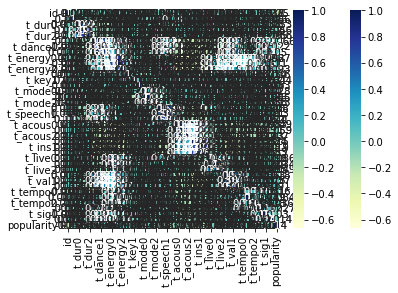

In [9]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()